In [1]:
from os import listdir
from os.path import isdir, join
import librosa
import random
import numpy as np
import matplotlib.pyplot as plt
import python_speech_features

In [2]:
# Dataset path and view possible targets
dataset_path = 'C:\\Users\\Greg\\ML\\Technical\\project\\git2\\monophonic_classfication_cnn\\padded'
for name in listdir(dataset_path):
    if isdir(join(dataset_path, name)):
        print(name)

A#3
A#4
A3
A4
B3
B4
C#3
C#4
C3
C4
D#3
D#4
D3
D4
E3
E4
F#3
F#4
F3
F4
G3
G4
_background_noise_


In [3]:
# Create an all targets list
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
print(all_targets)

['A#3', 'A#4', 'A3', 'A4', 'B3', 'B4', 'C#3', 'C#4', 'C3', 'C4', 'D#3', 'D#4', 'D3', 'D4', 'E3', 'E4', 'F#3', 'F#4', 'F3', 'F4', 'G3', 'G4', '_background_noise_']


In [4]:
# Leave off background noise set
all_targets.remove('_background_noise_')
print(all_targets)

['A#3', 'A#4', 'A3', 'A4', 'B3', 'B4', 'C#3', 'C#4', 'C3', 'C4', 'D#3', 'D#4', 'D3', 'D4', 'E3', 'E4', 'F#3', 'F#4', 'F3', 'F4', 'G3', 'G4']


In [5]:
# See how many files are in each
num_samples = 0
for target in all_targets:
    print(len(listdir(join(dataset_path, target))))
    num_samples += len(listdir(join(dataset_path, target)))
print('Total samples:', num_samples)

62
65
59
65
62
65
44
62
41
62
50
65
50
68
51
66
52
59
49
65
59
59
Total samples: 1280


In [6]:
# Settings
target_list = all_targets
feature_sets_file = 'all_targets_mfcc_sets.npz'
perc_keep_samples = 1.0 # 1.0 is keep all samples
val_ratio = 0.1
test_ratio = 0.1
sample_rate = 44100
num_mfcc = 16
len_mfcc = 16

In [7]:
# Create list of filenames along with ground truth vector (y)
filenames = []
y = []
for index, target in enumerate(target_list):
    print(join(dataset_path, target))
    filenames.append(listdir(join(dataset_path, target)))
    y.append(np.ones(len(filenames[index])) * index)

C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\A#3
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\A#4
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\A3
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\A4
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\B3
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\B4
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\C#3
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\C#4
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\C3
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\C4
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\D#3
C:\Users\Greg\ML\Technical\project\git2\monophonic_classfication_cnn\padded\D#4
C:\Users\Greg\ML\Technical\project\git2\monoph

In [8]:
# Check ground truth Y vector
print(y)
for item in y:
    print(len(item))

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2.]), array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 

In [9]:
# Flatten filename and y vectors
filenames = [item for sublist in filenames for item in sublist]
y = [item for sublist in y for item in sublist]

In [10]:
# Associate filenames with true output and shuffle
filenames_y = list(zip(filenames, y))
random.shuffle(filenames_y)
filenames, y = zip(*filenames_y)

In [11]:
# Only keep the specified number of samples (shorter extraction/training)
print(len(filenames))
filenames = filenames[:int(len(filenames) * perc_keep_samples)]
print(len(filenames))

1280
1280


In [12]:
# Calculate validation and test set sizes
val_set_size = int(len(filenames) * val_ratio)
test_set_size = int(len(filenames) * test_ratio)

In [13]:
# Break dataset apart into train, validation, and test sets
filenames_val = filenames[:val_set_size]
filenames_test = filenames[val_set_size:(val_set_size + test_set_size)]
filenames_train = filenames[(val_set_size + test_set_size):]

In [14]:
# Break y apart into train, validation, and test sets
y_orig_val = y[:val_set_size]
y_orig_test = y[val_set_size:(val_set_size + test_set_size)]
y_orig_train = y[(val_set_size + test_set_size):]

In [15]:
# Function: Create MFCC from given path
def calc_mfcc(path):
    
    # Load wavefile
    signal, fs = librosa.load(path, sr=sample_rate)
    
    # Create MFCCs from sound clip
    mfccs = python_speech_features.base.mfcc(signal, 
                                            samplerate=fs,
                                            winlen=0.256,
                                            winstep=0.050,
                                            numcep=num_mfcc,
                                            nfilt=26,
                                            nfft=11290,
                                            preemph=0.0,
                                            ceplifter=0,
                                            appendEnergy=False,
                                            winfunc=np.hanning)
    return mfccs.transpose()

In [16]:
# TEST: Construct test set by computing MFCC of each WAV file
prob_cnt = 0
x_test = []
y_test = []
for index, filename in enumerate(filenames_train):
    
    # Stop after 500
    if index >= 500:
        break
    
    # Create path from given filename and target item
    path = join(dataset_path, target_list[int(y_orig_train[index])], 
                filename)
    
    # Create MFCCs
    mfccs = calc_mfcc(path)
    
    if mfccs.shape[1] == len_mfcc:
        x_test.append(mfccs)
        y_test.append(y_orig_train[index])
    else:
        print('Dropped:', index, mfccs.shape)
        prob_cnt += 1
        

In [17]:
print('% of problematic samples:', prob_cnt / 500)

% of problematic samples: 0.0


MFCCs: [[-5.01850066e+01 -4.89437149e+01 -4.87229170e+01 -4.85184774e+01
  -4.74489141e+01 -4.60125391e+01 -4.52965477e+01 -4.53330754e+01
  -4.51311648e+01 -4.46455136e+01 -4.44119390e+01 -4.45096343e+01
  -4.50284579e+01 -4.55065032e+01 -4.56893225e+01 -4.56732490e+01]
 [ 2.17968537e+01  2.21443685e+01  2.24544601e+01  2.26893808e+01
   2.25880853e+01  2.22748296e+01  2.20322595e+01  2.20788934e+01
   2.20159460e+01  2.19057448e+01  2.20147063e+01  2.21177979e+01
   2.22962866e+01  2.22662302e+01  2.21259343e+01  2.19541175e+01]
 [-3.76081922e+00 -4.03519718e+00 -3.80223505e+00 -3.95343045e+00
  -4.96193484e+00 -6.18258453e+00 -6.84195225e+00 -7.15464651e+00
  -7.58449520e+00 -8.19549048e+00 -8.61827520e+00 -8.55122590e+00
  -8.09908796e+00 -7.49496106e+00 -7.17764653e+00 -7.11578774e+00]
 [-3.24633647e+00 -3.36451350e+00 -3.55383235e+00 -3.64888918e+00
  -3.44874381e+00 -3.37849638e+00 -3.42082102e+00 -3.61181821e+00
  -3.67477261e+00 -3.39855948e+00 -3.19985567e+00 -3.24739813e+00


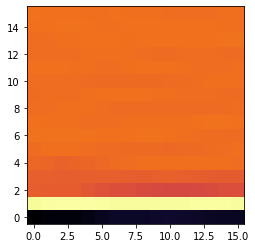

In [18]:
# TEST: Test shorter MFCC
# !pip install playsound
from playsound import playsound

idx = 10

# Create path from given filename and target item
path = join(dataset_path, target_list[int(y_orig_train[idx])], 
            filenames_train[idx])

# Create MFCCs
mfccs = calc_mfcc(path)
print("MFCCs:", mfccs)

# Plot MFCC
fig = plt.figure()
plt.imshow(mfccs, cmap='inferno', origin='lower')

# TEST: Play problem sounds
print(target_list[int(y_orig_train[idx])])
playsound(path)

In [19]:
# Function: Create MFCCs, keeping only ones of desired length
def extract_features(in_files, in_y):
    prob_cnt = 0
    out_x = []
    out_y = []
        
    for index, filename in enumerate(in_files):
    
        # Create path from given filename and target item
        path = join(dataset_path, target_list[int(in_y[index])], 
                    filename)
        
        # Check to make sure we're reading a .wav file
        if not path.endswith('.wav'):
            continue

        # Create MFCCs
        mfccs = calc_mfcc(path)

        # Only keep MFCCs with given length
        if mfccs.shape[1] == len_mfcc:
            out_x.append(mfccs)
            out_y.append(in_y[index])
        else:
            print('Dropped:', index, mfccs.shape)
            prob_cnt += 1
            
    return out_x, out_y, prob_cnt

In [20]:
# Create train, validation, and test sets
x_train, y_train, prob = extract_features(filenames_train, 
                                          y_orig_train)
print('Removed percentage:', prob / len(y_orig_train))
x_val, y_val, prob = extract_features(filenames_val, y_orig_val)
print('Removed percentage:', prob / len(y_orig_val))
x_test, y_test, prob = extract_features(filenames_test, y_orig_test)
print('Removed percentage:', prob / len(y_orig_test))

Removed percentage: 0.0
Removed percentage: 0.0
Removed percentage: 0.0


In [21]:
# Save features and truth vector (y) sets to disk
np.savez(feature_sets_file, 
         x_train=x_train, 
         y_train=y_train, 
         x_val=x_val, 
         y_val=y_val, 
         x_test=x_test, 
         y_test=y_test)

In [22]:
# TEST: Load features
feature_sets = np.load(feature_sets_file)
feature_sets.files

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']

In [23]:
len(feature_sets['x_train'])

1024

In [24]:
print(feature_sets['y_val'])

[ 4.  5.  1.  9. 19. 17.  1.  0. 17. 13.  5.  9.  1.  1.  7.  7.  7.  7.
 15. 19.  0.  7.  8.  8. 14.  6. 11.  3. 14.  1. 10. 12. 14.  5. 15.  2.
  1.  5. 10.  6. 15. 14. 19. 18.  8.  3. 17. 15. 17. 19.  9.  2. 13. 19.
 18. 11.  3.  7.  0. 19. 11. 20. 13.  9. 13.  4. 19. 10. 10. 16. 18. 16.
 17. 10. 13. 17. 19.  2.  4. 13.  7.  7. 11.  1. 21. 16. 10. 20.  1.  8.
 16. 15. 14. 20.  3. 13. 20.  3.  2. 14.  9. 13.  7.  2. 16.  2.  2. 16.
  5. 16.  9. 16.  6. 11. 17.  6. 11. 10. 21. 18. 16. 11.  7. 19. 11.  3.
 10.  8.]
